In [1]:
import os

base_dir = './datasets'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_0_front_dir = os.path.join(train_dir, '0_front')
train_1_back_dir = os.path.join(train_dir, '1_back')
train_1_front_dir = os.path.join(train_dir, '1_front')
train_2_back_dir = os.path.join(train_dir, '2_back')
train_2_front_dir = os.path.join(train_dir, '2_front')
train_5_front_dir = os.path.join(train_dir, '5_front')
train_ILU_dir = os.path.join(train_dir, 'ILU')

val_0_front_dir = os.path.join(val_dir, '0_front')
val_1_back_dir = os.path.join(val_dir, '1_back')
val_1_front_dir = os.path.join(val_dir, '1_front')
val_2_back_dir = os.path.join(val_dir, '2_back')
val_2_front_dir = os.path.join(val_dir, '2_front')
val_5_front_dir = os.path.join(val_dir, '5_front')
val_ILU_dir = os.path.join(val_dir, 'ILU')

save_dir = os.path.join(base_dir, 'saved_models')

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

# batch_norm(batch_re-norm), ensemble, regularization 안했음

h = 150 # height
w = 150 # width
c = 3  # channels
num_classes = 7

model = models.Sequential()

model.add(layers.Conv2D(64, 3, activation='relu', input_shape=(h, w, c,)))
# model.add(layers.Conv2D(32, 3, activation='relu'))t
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, 3, activation='relu'))
# model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, 3, activation='relu'))
# model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.4, 
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=[1, 2],
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=25)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=25)

Found 1753 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.


In [4]:
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

callbacks_list = [
    EarlyStopping(
#         monitor='val_loss',
        monitor='val_acc',
        patience=10
    ),
    ModelCheckpoint(
        filepath=os.path.join(save_dir, 'hand_sign.h5'),
#         monitor='val_loss',
        monitor='val_acc',
        save_best_only=True
    ),
#     ReduceLROnPlateau(
#         # 검증 손실이 10 epoch동안 좋아지지 않으면 학습률에 0.1을 곱함(학습률을 1/10으로)
#         monitor='val_loss',
#         factor=0.1,
#         patience=10
#     )
]

model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
validation_steps = np.ceil(val_generator.samples/val_generator.batch_size)

history = model.fit(train_generator, epochs=100,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=callbacks_list,
                    validation_data=val_generator,
                    validation_steps=validation_steps)

model.save(os.path.join(save_dir, 'hand_sign_2.h5'))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 71.0 steps, validate for 140.0 steps
Epoch 1/100
71/71 [==============================] - 11s 159ms/step - loss: 2.7000 - acc: 0.1472 - val_loss: 1.9587 - val_acc: 0.1463
Epoch 2/100
71/71 [==============================] - 11s 151ms/step - loss: 1.9727 - acc: 0.1495 - val_loss: 1.9491 - val_acc: 0.1426
Epoch 3/100
71/71 [==============================] - 11s 155ms/step - loss: 1.9611 - acc: 0.1415 - val_loss: 1.9449 - val_acc: 0.1460
Epoch 4/100
71/71 [==============================] - 11s 159ms/step - loss: 1.9516 - acc: 0.1540 - val_loss: 1.9456 - val_acc: 0.1597
Epoch 5/100
71/71 [==============================] - 11s 155ms/step - loss: 1.9452 - acc: 0.1574 - val_loss: 1.9443 - val_acc: 0.1494
Epoch 6/100
71/71 [==============================] - 11s 154ms/step - loss: 1.9358 - acc: 0.1717 - val_loss: 1.9528 - val_acc: 0.1409
Epoch 7/100
71/71 [==============================] - 11s 159ms/step - loss: 1.9339 - acc: 0.1797 - 

71/71 [==============================] - 11s 154ms/step - loss: 0.4770 - acc: 0.8380 - val_loss: 0.6691 - val_acc: 0.7966
Epoch 61/100
71/71 [==============================] - 11s 154ms/step - loss: 0.4175 - acc: 0.8477 - val_loss: 0.3935 - val_acc: 0.8506
Epoch 62/100
71/71 [==============================] - 11s 155ms/step - loss: 0.4628 - acc: 0.8471 - val_loss: 0.1946 - val_acc: 0.9329
Epoch 63/100
71/71 [==============================] - 11s 157ms/step - loss: 0.4125 - acc: 0.8562 - val_loss: 0.3508 - val_acc: 0.8797
Epoch 64/100
71/71 [==============================] - 12s 167ms/step - loss: 0.3783 - acc: 0.8659 - val_loss: 0.4974 - val_acc: 0.8557
Epoch 65/100
71/71 [==============================] - 12s 163ms/step - loss: 0.3688 - acc: 0.8739 - val_loss: 0.3178 - val_acc: 0.8746
Epoch 66/100
71/71 [==============================] - 12s 164ms/step - loss: 0.4355 - acc: 0.8500 - val_loss: 0.2591 - val_acc: 0.8966
Epoch 67/100
71/71 [==============================] - 12s 163ms/step

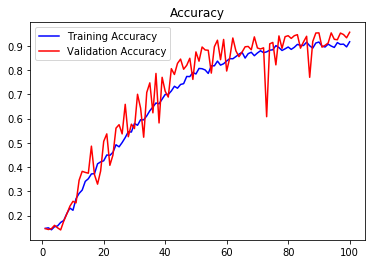

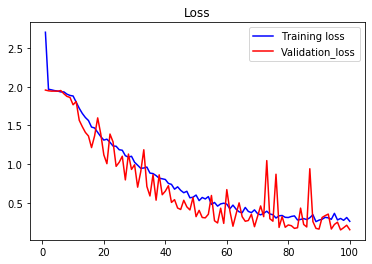

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()

# # 그래프가 너무 지그재그면 하기
# def smooth_curve(points, factor=0.9):
#     smoothed_curve = []
#     for point in points:
#         if smoothed_curve:
#             prev = smoothed_curve[-1]
#             smoothed_curve.append(prev*factor + point*(1-factor))
#         else:
#             smoothed_curve.append(point)
            
#     return smoothed_curve

# plt.plot(epochs, smooth_curve(acc), 'b', label='smoothed train_acc')
# plt.plot(epochs, smooth_curve(val_acc), 'r', label='smoothed val_acc')
# plt.title("Accuracy")
# plt.legend()
# plt.figure()

# plt.plot(epochs, smooth_curve(loss), 'b', label='smoothed train_loss')
# plt.plot(epochs, smooth_curve(val_loss), 'r', label='smoothed val_loss')
# plt.title("Loss")
# plt.legend()
# plt.show()